# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [ ]:
#pip install statsmodels 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
%ls

02_04_lectura-de-datos.ipynb        nhanes_2015_2016.csv
03_00_pivot_table.ipynb             NYC_Free_Public_WiFi_03292017.csv
07_02_pie_box_scatter_bubble.ipynb  README.md
Canada.xlsx                         requierementsEXL
datasets/                           requirements.txt
Entrega-bien2.ipynb                 runtime.txt
heartbien.csv                       session_01/
Ian.ipynb                           welcome_binder.ipynb
Medals.csv


In [4]:
df = pd.read_csv("heartbien.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


In [5]:
df.count()

Age               746
Sex               746
ChestPainType     746
RestingBP         746
Cholesterol       746
FastingBS         746
RestingECG        746
MaxHR             746
ExerciseAngina    746
Oldpeak           746
ST_Slope          746
HeartDisease      746
dtype: int64

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.count()

Age               746
Sex               746
ChestPainType     746
RestingBP         746
Cholesterol       746
FastingBS         746
RestingECG        746
MaxHR             746
ExerciseAngina    746
Oldpeak           746
ST_Slope          746
HeartDisease      746
dtype: int64

In [9]:
df.describe(include=[np.number])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


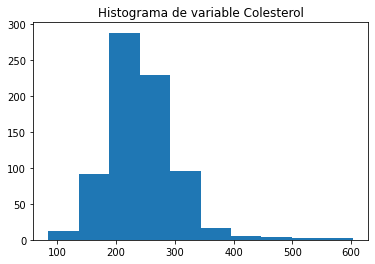

In [45]:
plt.title('Histograma de variable Colesterol')
plt.hist(df['Cholesterol'])

plt.show()

In [13]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


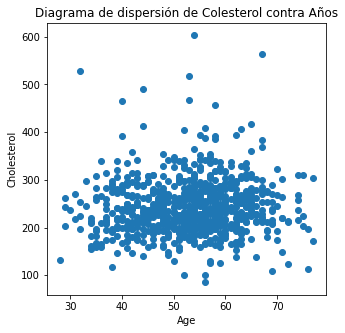

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(x = df['Age'], y = df['Cholesterol'])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Diagrama de dispersión de Colesterol contra Años")
plt.show()

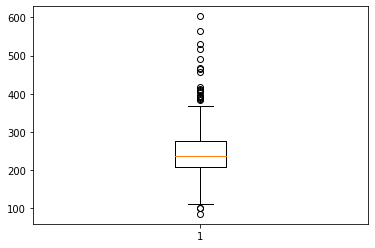

In [40]:
plt.boxplot(df["Cholesterol"])
plt.show()

In [43]:
AgeCH = df[["Age","Cholesterol"]]

model_ols = sm.OLS.from_formula("Cholesterol ~Age", data=AgeCH)

result = model_ols.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.578
Date:                Wed, 20 Oct 2021   Prob (F-statistic):              0.109
Time:                        03:59:10   Log-Likelihood:                -4100.5
No. Observations:                 746   AIC:                             8205.
Df Residuals:                     744   BIC:                             8214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    225.2995     12.236     18.412      0.0

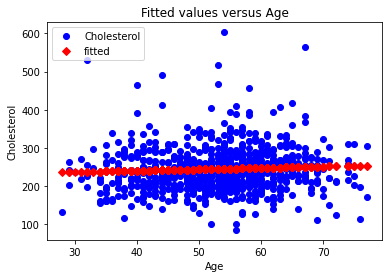

In [44]:
sm.graphics.plot_fit(result,1, vlines=False);